# Initialize NMRlipids databank

In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import MDAnalysis
import urllib.request
import yaml

sys.path.insert(1, '../../Databank/Scripts/BuildDatabank/')
from databankLibrary import download_link, lipids_dict, databank

path = '../../Databank/Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

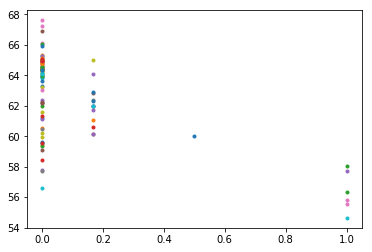

In [24]:
MATRIX = 'POPC'
ADDITIVE = 'POPS'

apl_DICT = {}
for system in systems:
    
    try:
        NADDITIVE = np.sum(system['COMPOSITION'][ADDITIVE]['COUNT'])
    except:
        NADDITIVE = 0    
    
    try:
        NMATRIX = np.sum(system['COMPOSITION'][MATRIX]['COUNT'])
    except:
        NMATRIX = 0
    
    NLIPIDS = 0
    for molecule in system['COMPOSITION']:
        if molecule in lipids_dict:
            NLIPIDS += np.sum(system['COMPOSITION'][molecule]['COUNT'])
    
    if (NMATRIX + NADDITIVE) != NLIPIDS:
        #print('skipped')
        continue
    
    
    APLpath = system['path'] + 'apl.json'
    try:
        f = open(APLpath)
        APLdata = json.load(f)
    except:
        print('apl.json not found from' + system['path'])
        
    sumAPL = 0
    sumIND = 0
    for i,j in APLdata.items():
        sumAPL += j
        sumIND += 1
    APL = sumAPL/sumIND
    
    plt.plot(NADDITIVE / NLIPIDS, APL,'.')
    
    try:
        CaConcentration = system['COMPOSITION']['CAL']['COUNT'] * 55.5 / system['COMPOSITION']['SOL']['COUNT']
    except:
        CaConcentration = 0
    lipidsRATIO = 100*NADDITIVE / NLIPIDS
    forcefield = system.get('FF')
    temperature = system.get('TEMPERATURE')
    DOI = system.get('DOI')
    apl_DICT[lipidsRATIO,CaConcentration,forcefield,temperature,DOI] = APL
   

In [27]:
for key in apl_DICT:
    outfile=open('./results/' + str(key[2]) + "_T" + str(key[3]) + "_CaCl" + str(round(key[1],3)) + 'PCPG_APL.dat','w')
    #outfile.write('#Lipid ratio        APL \n')
    outfile.close()
                    
for key in apl_DICT:
    outfile=open('./results/' + str(key[2]) + "_T" + str(key[3]) + "_CaCl" + str(round(key[1],3)) + 'PCPG_APL.dat','a')
    #Lipid2cont = int(round(key[0]))
    #CaConsentration = key[1]
    outfile.write(str(round(key[0],3)) + " " + str(apl_DICT[key]) + " " + str(key[4]))
    outfile.write('\n')
    outfile.close()
    !sort -n -k 1 {'./results/' + str(key[2]) + "_T" + str(key[3]) + "_CaCl" + str(round(key[1],3)) + 'PCPG_APL.dat'} -o {'./results/' + str(key[2]) + "_T" + str(key[3]) + "_CaCl" + str(round(key[1],3)) + 'PCPG_APL.dat'}
#plt.legend(loc='best',ncol=2, fontsize=15)

sort: cannot read: ./results/CHARMM36: No such file or directory
/bin/sh: 1: Syntax error: "(" unexpected
sort: cannot read: ./results/CHARMM36: No such file or directory
/bin/sh: 1: Syntax error: "(" unexpected
sort: cannot read: ./results/CHARMM36: No such file or directory
sort: cannot read: ./results/CHARMM36: No such file or directory
sort: cannot read: ./results/CHARMM36: No such file or directory
sort: cannot read: ./results/Slipids: No such file or directory
sort: cannot read: ./results/Slipids: No such file or directory
/bin/sh: 1: Dang_T310.0_CaCl0PCPG_APL.dat: not found
/bin/sh: 1: Syntax error: "(" unexpected
/bin/sh: 1: Syntax error: "(" unexpected
sort: cannot read: ./results/CHARMM36: No such file or directory
sort: cannot read: ./results/Slipids: No such file or directory


Text(0,0.5,'Area per molecule (nm)^2')

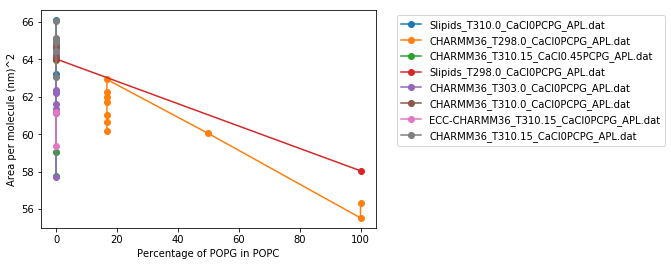

In [28]:
for subdir, dirs, files in os.walk(r'./results/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("APL.dat"):
            with open(filepath) as APLfile:
                lines = APLfile.readlines()#[1:]
                x = [float(line.split()[0]) for line in lines]
                y = [float(line.split()[1]) for line in lines]
                #print(filepath,x,y)
                if len(x) > 1:
                    plt.plot(x,y,label = filename,marker='o')
plt.legend(bbox_to_anchor=(1.05, 1),loc='best')
plt.xlabel('Percentage of POPG in POPC')
plt.ylabel('Area per molecule (nm)^2')
#plt.savefig('../Figs/aplTST.png', bbox_inches='tight')

In [39]:
for system in systems:
    NLIPIDS = 0
    for molecule in system['COMPOSITION']:
        if molecule in lipids_dict:
            NLIPIDS += np.sum(system['COMPOSITION'][molecule]['COUNT'])
    
    try:
        if 'CHARMM' in system['FF'] and np.sum(system['COMPOSITION']['POPC']['COUNT']) == NLIPIDS:
            print(system['TEMPERATURE'])
    except:
        continue

310.0
303.0
303.0
303.15
303.0
310.15
313.0
303.0
310.15
303.0
310.0
310.15
300.0
303.0
303.0
310.15
310.15
303.0
303.0
303.0
303.0
310.15
310.15
303.0
310.15
303.0
310.15
310.15
303.0
303.0
310.0
310.0
310.0
310.15
303.0
303.0
303.0
310.15
310.15
303.0
310.0
310.0
303.0
303.0
310.0
310.15
310.15
310.0
303.0
310.0
303.0
303.0
303.0
